In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [3]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [4]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역,승차,234.0
1,2008-01-01,150.0,서울역,승차,-420.0
2,2008-01-01,150.0,서울역,승차,-318.0
3,2008-01-01,150.0,서울역,승차,-161.0
4,2008-01-01,150.0,서울역,승차,-205.0
5,2008-01-01,150.0,서울역,승차,13.0
6,2008-01-01,150.0,서울역,승차,538.0
7,2008-01-01,150.0,서울역,승차,632.0
8,2008-01-01,150.0,서울역,승차,604.0
9,2008-01-01,150.0,서울역,승차,808.0


In [5]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [6]:
df['name']

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [7]:
s = df['name']
s

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [8]:
s = list(set(s))
s

['명일',
 '가산디지털단지',
 '회현',
 '신흥',
 '신대방',
 '단대오거리',
 '총신대입구(이수)',
 '반포',
 '부천시청',
 '신정네거리',
 '송파',
 '까치울',
 '한양대',
 '남부터미널',
 '상수',
 '문래',
 '대흥',
 '영등포시장',
 '봉화산',
 '상일동',
 '역촌',
 '동대입구',
 '녹사평',
 '화랑대',
 '삼성',
 '오목교',
 '둔촌동',
 '천왕',
 '충무로',
 '동묘앞',
 '고속터미널',
 '창동',
 '김포공항',
 '뚝섬유원지',
 '역삼',
 '압구정',
 '월드컵경기장',
 '석촌',
 '선릉',
 '연신내',
 '애오개',
 '제기동',
 '마장',
 '마천',
 '명동',
 '공덕',
 '오금',
 '한강진',
 '사가정',
 '신설동',
 '보라매',
 '마곡',
 '합정',
 '구파발',
 '논현',
 '답십리',
 '구로디지털단지',
 '충정로',
 '남한산성입구',
 '일원',
 '잠실',
 '고덕',
 '청담',
 '남성',
 '을지로4가',
 '안암',
 '방배',
 '온수',
 '동작',
 '굴포천',
 '공릉',
 '복정',
 '굽은다리',
 '산성',
 '도봉산',
 '신용산',
 '상월곡',
 '강남',
 '고려대',
 '모란',
 '서초',
 '청구',
 '봉천',
 '효창공원앞',
 '태릉입구',
 '종각',
 '혜화',
 '까치산',
 '당산',
 '먹골',
 '마포구청',
 '강동',
 '목동',
 '신도림',
 '송정',
 '동대문',
 '새절',
 '아현',
 '장한평',
 '광흥창',
 '종로3가',
 '신사',
 '상계',
 '길동',
 '창신',
 '장암',
 '경복궁',
 '뚝섬',
 '양천구청',
 '대림',
 '수서',
 '중화',
 '상도',
 '길음',
 '금호',
 '거여',
 '강남구청',
 '몽촌토성',
 '월곡',
 '시청',
 '당고개',
 '개롱',
 '청량리',
 '사당',
 '학여울',
 '미아',
 '잠원',
 '마포',

In [9]:
len(s)

241

In [10]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20

In [11]:
s[1]

'가산디지털단지'

In [12]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [13]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [14]:
data1 = df[df['name']=='강남']
data1

,date,number,name,div,a
620,2008-01-01,222.0,강남,승차,945.0
621,2008-01-01,222.0,강남,승차,314.0
622,2008-01-01,222.0,강남,승차,-64.0
623,2008-01-01,222.0,강남,승차,-205.0
624,2008-01-01,222.0,강남,승차,-806.0
625,2008-01-01,222.0,강남,승차,-405.0
626,2008-01-01,222.0,강남,승차,-336.0
627,2008-01-01,222.0,강남,승차,-474.0
628,2008-01-01,222.0,강남,승차,-628.0
629,2008-01-01,222.0,강남,승차,-584.0


In [15]:
name = data1.iloc[:1,2,]
name

620    강남
Name: name, dtype: object

In [16]:
name = name.to_string(index=False)

In [17]:
name

' 강남'

In [18]:
plt.savefig(name)

<Figure size 432x288 with 0 Axes>

In [19]:
len(data1)

78520

In [20]:
data1.shape

(78520, 5)

In [21]:
data1 = df[df['name']=='강남']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# y_train=np.repeat(y_train.reshape(-1,1), 20, axis=1).reshape(-1,20,1)
# y_test=np.repeat(y_test.reshape(-1,1), 20, axis=1).reshape(-1,20,1)
# 모델 구성하기

                date  number name div        a
620       2008-01-01   222.0   강남  승차    945.0
621       2008-01-01   222.0   강남  승차    314.0
622       2008-01-01   222.0   강남  승차    -64.0
623       2008-01-01   222.0   강남  승차   -205.0
624       2008-01-01   222.0   강남  승차   -806.0
625       2008-01-01   222.0   강남  승차   -405.0
626       2008-01-01   222.0   강남  승차   -336.0
627       2008-01-01   222.0   강남  승차   -474.0
628       2008-01-01   222.0   강남  승차   -628.0
629       2008-01-01   222.0   강남  승차   -584.0
630       2008-01-01   222.0   강남  승차   -661.0
631       2008-01-01   222.0   강남  승차   -751.0
632       2008-01-01   222.0   강남  승차   -839.0
633       2008-01-01   222.0   강남  승차   -723.0
634       2008-01-01   222.0   강남  승차   -198.0
635       2008-01-01   222.0   강남  승차    800.0
636       2008-01-01   222.0   강남  승차   1650.0
637       2008-01-01   222.0   강남  승차   1725.0
638       2008-01-01   222.0   강남  승차    507.0
639       2008-01-01   222.0   강남  승차    -58.0
5860      200

In [22]:
from keras.models import load_model
model = load_model('xx.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [69]:
model = Sequential()

model.add(LSTM(512,  return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(512,  return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(1, input_shape=(None,1), return_sequences=True))


# 수동학습
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64)
model.summary()

ValueError: Error when checking target: expected lstm_33 to have 3 dimensions, but got array with shape (62796, 1)

In [64]:
from keras.models import load_model
model = load_model('xx.h5')

In [23]:
# model.save('xx.h5')

In [24]:
# model = Sequential()
# model.add(LSTM(512, batch_input_shape=(1, look_back, 1), stateful=True))
# model.add(Dropout(0.3))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')


# for i in range(200):
#     model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False)
#     model.reset_states()


# # model.add(LSTM(512, input_shape=(None, 1)))
# # model.add(Dropout(0.3))
# # model.add(LSTM(i, input_shape=(None, 1)))

# # model.add(Dense(i))
# # model.add(Dropout(0.3))
# # model.add(Dropout(0.3))
# # model.add(Dense(64))


# # name = "tt.jpg"
# # 수동학습
# # model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
# # hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

# # 저장된거불러오기
# from keras.models import load_model
# # model = load_model('trythis.h5')
# # model.fit(x_train, y_train, epochs=10, batch_size=64)
# model.summary()

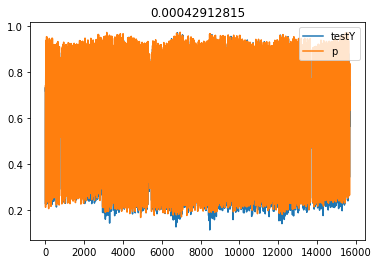

0.00042912815


In [23]:
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
plt.show()
# plt.savefig(datetime.datetime.now())
# plt.savefig(name)
# plt.clf()
print(mean_squared_error(y_test, p))

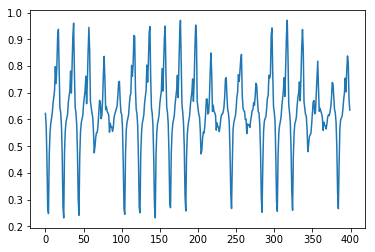

In [25]:
plt.plot(p[-400:])

In [27]:
x_test.shape

(15684, 20, 1)

In [28]:
x_test[-1].shape

(20, 1)

In [29]:
pd = x_test[-20:, :, :]

In [35]:
pd.shape

(20, 20, 1)

In [56]:
pd = model.predict(x_test[-400:, :, :])
pd = pd.reshape(-1, 20, 1)
pd.shape
# currentStep = b[:, -20:, :]

(20, 20, 1)

In [57]:
r = []
currentStep = pd

for i in range(10):
    print(currentStep.shape)
    currentStep = model.predict(currentStep)
    currentStep = currentStep.reshape(-1, 20, 1)
    r.append(currentStep)

(20, 20, 1)
(1, 20, 1)


ValueError: cannot reshape array of size 1 into shape (20,1)

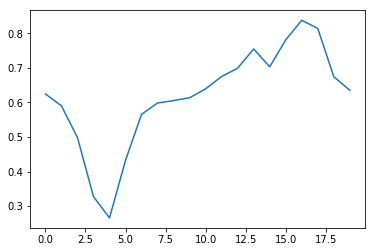

In [31]:
plt.plot(r)

In [28]:
x_test.shape

(15684, 20, 1)

In [29]:
predictions.shape

(15684, 1)

In [30]:
b = predictions
b = b.reshape(-1, 1)

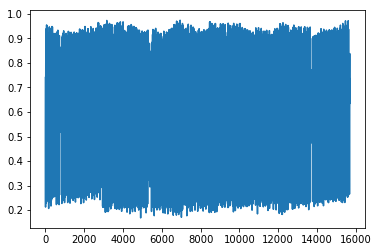

In [31]:
plt.plot(b)

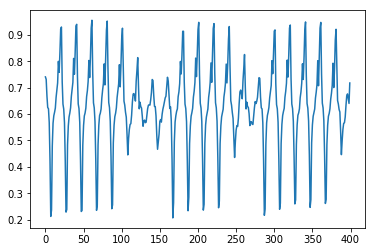

In [32]:
plt.plot(b[:400])

In [33]:
b.shape #(15684, 1)
b=np.repeat(b.reshape(-1,1), 20, axis=1).reshape(-1,20,1)
b.shape #(15684, 20, 1)

(15684, 20, 1)

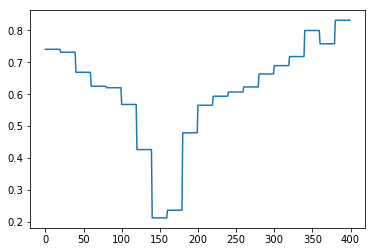

In [34]:
b=b.reshape(-1,1)
plt.plot(b[:400])

In [35]:
future = []
currentStep = b[:, -20:, :]

for i in range(2):
    print(currentStep.shape)
    currentStep = model.predict(currentStep)
    future.append(currentStep)
    currentStep=np.repeat(currentStep.reshape(-1,1), 20, axis=1).reshape(-1,20,1)


# for i in range(2):
#     print(currentStep.shape)
#     currentStep = model.predict(currentStep)
#     future.append(currentStep)

# model.reset_states()

IndexError: too many indices for array

In [ ]:
# predictions = model.predict(x_test)
# predictions = np.repeat(currentStep.reshape(-1,1), 20, axis=1).reshape(-1,20,1)
# future = []
# currentStep = predictions[:,-20:,:] #last step from the previous prediction

# for i in range(2):
#     print(currentStep.shape)
#     currentStep = model.predict(currentStep) #get the next step
#     future.append(currentStep) #store the future steps
#     currentStep=np.repeat(currentStep.reshape(-1,1), 20, axis=1).reshape(-1,20,1)

In [ ]:
tt = np.asarray(future)
tt.shape

In [ ]:
t1 = future
t1 = np.asarray(t1)
t1 = t1.reshape(-1, 1)
plt.plot(t1[-400:])

In [ ]:
model.reset_states()

In [ ]:
t1 = future
t1 = np.asarray(t1)
t1 = t1.reshape(-1, 1)
plt.plot(t1[-400:])

In [ ]:
t1 = future
t1 = np.asarray(t1)
t1 = t1.reshape(-1, 1)
plt.plot(t1[:400])

In [ ]:
future = np.asarray(future)
future = future.reshape(-1,1)
plt.plot(future[:400])

In [ ]:
future = np.asarray(future)
future = future.reshape(-1,1)
plt.plot(future[-400:])

In [ ]:
plt.plot(future)

In [ ]:
t1 = predictions[-20:, :, :]

In [ ]:
t2 = = predictions[:,-20 :, :]

In [ ]:
future.shape

In [ ]:
c = np.asarray(future)
c.shape

In [ ]:
c = c.reshape(-1, 1)
c.shape

In [ ]:
plt.plot(c[:2000])

In [ ]:
plt.plot(c)

In [ ]:
d = p
d=d.reshape(-1,1)
plt.plot(d[:800])

In [ ]:
# x_train[-1] = x_train[-1].reshape(-1, 1)
# x_train[-1].shape

In [ ]:
# x_train[-1] = x_train[-1][:,-1:,np.newaxis]

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
b

In [ ]:
future =[]
future.append(b)

for i in range(10):
    predict = model.predict(future[-1])
    predict = predict[:, :, np.newaxis]
    future.append(predict)

In [ ]:
future.shape

In [ ]:
c = np.asarray(future)

In [ ]:
c = c.reshape(-1,1)

In [ ]:
plt.plot(c[:100])

In [ ]:
# predictions = predictions.shape(62796,1,1)
# b = a[:, :, newaxis]
predictions = predictions[:, :, np.newaxis]
predictions.shape

In [ ]:
future = []
currentStep = predictions[:, -1:, :]

In [ ]:
currentStep = currentStep[16:]

In [ ]:
currentStep.shape

In [ ]:
# currentStep = currentStep.reshape(3139, look_back, 1)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# currentStep = np.reshape(currentStep, (-1, ))

In [ ]:
currentStep.shape

In [ ]:
future=[]

for i in range(100):
    print(i)
    currentStep = model.predict(currentStep)
    currentStep = currentStep[:, :, np.newaxis]
    print(currentStep.shape)
    future.append(currentStep)

In [ ]:
future

In [ ]:
a = np.asarray(future)

In [ ]:
a.shape

In [ ]:
a.reshape(1, -1)

In [ ]:
predictions = np.zeros((look_ahead, 1))

In [ ]:
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])

In [ ]:
xhat

In [ ]:
plt.plot(predictions)

In [ ]:
predictions

In [ ]:
p[-10:]

In [ ]:
y_test[-10:]

In [ ]:
x_test[-10:]

In [ ]:
x_train.shape

In [ ]:
# x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
predictions = model.predict(x_train)

In [ ]:
predictions.shape

In [ ]:
future = []
currentStep = predictions[:, -1: :]

In [ ]:
for i in range(50):
    currentStep = model.predict(currentStep)
    future.append(currentStep)

In [ ]:
# # Plot training & validation loss values
# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data', 'train','predict'], loc='best')
plt.show()

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
yhat = y_test
yhat = yhat.reshape(len(yhat), 1, 1)

In [ ]:
y = model.predict(yhat)
y

In [ ]:
data = y

data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(y_test)
plt.xlim(0, 100)

In [ ]:
plt.plot(p)
plt.xlim(0, 100)

In [ ]:
print(y_test[:100])

In [ ]:
print(p[:100])

In [ ]:
plt.scatter(len(y_test), y_test)

In [ ]:
data = y
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
# x_train, y_train = create_dataset(train, look_back)
# x_test, y_test = create_dataset(test, look_back)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# x = range(0,len(y))
x = np.arange(0, len(y))
x=x.reshape(len(x),1)

In [ ]:
print(len(x))
print(len(y))
print(x.shape)
print(y.shape)
print(type(y))
print(type(x))

In [ ]:
x=x.reshape(len(x),1)
x.shape

In [ ]:
data = y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(x_train)
plt.plot(y_train)
plt.show()

In [ ]:
plt.plot(x_train)

In [ ]:
plt.plot(y_train)

In [ ]:
plt.plot(p)

In [ ]:
from xgboost import XGBRegressor
# import xgboost as xgb
# from xgboost.sklearn import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x,y, verbose=False)

# Get the mean absolute error on the validation data :
# XGBpredictions = XGBModel.predict(val_X)
# MAE = mean_absolute_error(val_y , XGBpredictions)
# print('XGBoost validation MAE = ',MAE)

In [ ]:
from xgboost import plot_tree
plot_tree(XGBModel)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

In [ ]:
# 저장
model_json = model.to_json()
with open("s[0].json", "w") as json_file :
    json_file.write(model_json)
model.save_weights("s[0].h5")
print("Saved model to disk")

In [ ]:
# # 모델 불러오기
# from keras.models import model_from_json
# json_file = open("model1.json", "r")
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# model.load_weights("model1.h5")
# model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
data = y # p
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
x = np.arange(0, len(y))
x=x.reshape(len(x),1)
x = scaler.fit_transform(x)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

y_train = data[0:train_size]
y_test = data[train_size:len(data)]
x_train = x[0:train_size]
x_test = x[train_size:len(x)]
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(p)

In [ ]:
plt.plot(y_test)